In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
data = pd.read_csv('../data/subjects-xy/subject15_1.csv', delimiter=";")
data.shape

(3468, 18)

In [5]:
data.head(5)

,Timestamp,Lap_Number,Position.x.,Position.y.,Position.z.,Orientation.x.,Orientation.y.,Orientation.z.,Path_Deviation,Estimated_Path_Center.x.,Estimated_Path_Center.y.,Estimated_Path_Center.z.,Gaze_Location.x.,Gaze_Location.y.,Gaze_Location.z.,Subject,Gaze.x.,Gaze.y.
0,1683320367949,0,-255.4,347.5002,-178.5393,1.392695,0.000000,0.0,1.2098,-254.2043,244.2661,-178.3549,-236.497650,321.242427,6.570643,15,1317.764,357.2435
1,1683320367966,0,-255.4,347.5168,-178.0287,1.535663,-0.002307,0.0,1.1320,-254.2812,244.3074,-177.8562,-230.536000,320.351846,8.853700,15,1329.105,356.0506
2,1683320367982,0,-255.4,347.5318,-177.4959,1.681299,359.986500,0.0,1.0508,-254.3615,244.3481,-177.3357,-224.574350,319.461266,11.136757,15,1340.190,354.8846
3,1683320368000,0,-255.4,347.5453,-176.9416,1.829146,359.956600,0.0,0.9663,-254.4450,244.3904,-176.7943,-217.741936,318.205011,13.536593,15,1352.697,353.0272
4,1683320368016,0,-255.4,347.5575,-176.3668,1.978781,359.896800,0.0,0.8787,-254.5316,244.4342,-176.2328,-210.909521,316.948755,15.936429,15,1364.924,351.2115


In [6]:
data2 = pd.read_csv('../data/subjects-xy/subject14_1.csv', delimiter=";")
data.head(5)

,Timestamp,Lap_Number,Position.x.,Position.y.,Position.z.,Orientation.x.,Orientation.y.,Orientation.z.,Path_Deviation,Estimated_Path_Center.x.,Estimated_Path_Center.y.,Estimated_Path_Center.z.,Gaze_Location.x.,Gaze_Location.y.,Gaze_Location.z.,Subject,Gaze.x.,Gaze.y.
0,1683320367949,0,-255.4,347.5002,-178.5393,1.392695,0.000000,0.0,1.2098,-254.2043,244.2661,-178.3549,-236.497650,321.242427,6.570643,15,1317.764,357.2435
1,1683320367966,0,-255.4,347.5168,-178.0287,1.535663,-0.002307,0.0,1.1320,-254.2812,244.3074,-177.8562,-230.536000,320.351846,8.853700,15,1329.105,356.0506
2,1683320367982,0,-255.4,347.5318,-177.4959,1.681299,359.986500,0.0,1.0508,-254.3615,244.3481,-177.3357,-224.574350,319.461266,11.136757,15,1340.190,354.8846
3,1683320368000,0,-255.4,347.5453,-176.9416,1.829146,359.956600,0.0,0.9663,-254.4450,244.3904,-176.7943,-217.741936,318.205011,13.536593,15,1352.697,353.0272
4,1683320368016,0,-255.4,347.5575,-176.3668,1.978781,359.896800,0.0,0.8787,-254.5316,244.4342,-176.2328,-210.909521,316.948755,15.936429,15,1364.924,351.2115


In [7]:
position = data.iloc[:,2:5].to_numpy()
position.shape

(3468, 3)

<Axes: >

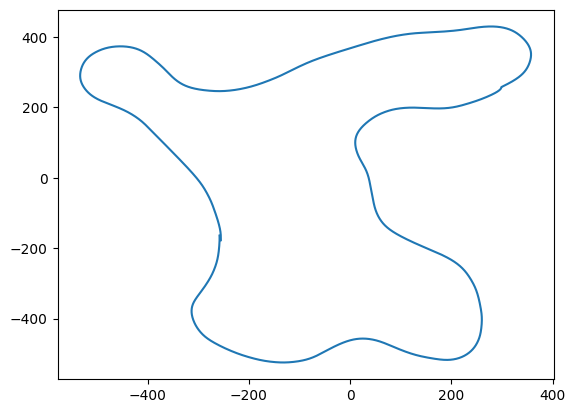

In [8]:
sns.lineplot(x=position[:,0], y=position[:,2], sort=False)

In [9]:
def read_data_from_subjects():
    dataset = []
    folder = '../data/subjects-xy/'
    files = os.listdir(folder)

    for f in files:
        data = pd.read_csv(folder + f, delimiter=";").to_numpy()
        positions = data[:,[2, 4]]
        dataset.append(positions)

    return dataset

In [10]:
dataset = read_data_from_subjects()

In [59]:
def plot_trajectories(optimal_path, real_path, waypoints):
    f, ax = plt.subplots(1, 1, figsize=(7, 7))

    for i in range(int(len(real_path) / 2)):
        ax = sns.lineplot(
            x=real_path[i*2][0::4,0], 
            y=real_path[i*2][0::4,1], 
            sort=False, 
            color="gray", linewidth=0.5
        )

    ax = sns.lineplot(x=optimal_path[:,0], y=optimal_path[:,1], sort=False, color="maroon", legend="auto")
    ax = sns.scatterplot(x=waypoints[:,0], y=waypoints[:,1], color="maroon", legend="auto")
    ax.set_xlabel('x')
    ax.set_ylabel('y')

In [12]:
optimal_path = pd.read_csv('../data/trajectories/optimal_path.csv', delimiter=";").to_numpy()
optimal_heading = pd.read_csv('../data/trajectories/optimal_heading.csv', delimiter=";").to_numpy()
waypoints = pd.read_csv('../data/trajectories/waypoints.csv', delimiter=";").to_numpy()

In [13]:
optimal_heading[0:5]

array([[-0.105598,  0.994409],
       [-0.107282,  0.994229],
       [-0.108977,  0.994044],
       [-0.110682,  0.993856],
       [-0.112397,  0.993663]])

In [14]:
angles = np.angle(optimal_heading[:,0] + optimal_heading[:,1] * 1j)
angles

array([1.67659156, 1.67828515, 1.67999022, ..., 1.61051178, 1.6111713 ,
       1.61180483])

In [58]:
rel_pos = optimal_path[0] - waypoints[1,0:2]
rel_vec = rel_pos / np.linalg.norm(rel_pos)

ang_vec = np.dot(optimal_heading[0], rel_vec) / (np.linalg.norm(optimal_heading[0]) * rel_vec)
ang_pos = np.angle(ang_vec[0] + ang_vec[1] * 1j, deg=True)
ang_pos

165.6360120814757

In [49]:
np.linalg.norm(rel_vec)

1.0

In [34]:
def get_relative_position(waypoints, path):

    n_frames = path.shape[0]
    n_waypoints = waypoints.shape[0]

    n_frames_per_waypoint = int(n_frames / n_waypoints)

    rel_pos = np.zeros((n_frames, 2), dtype=np.float32)

    for i in range(n_frames):
        j = np.floor(int(i / n_frames_per_waypoint), dtype=np.uint16)
        rel_pos[i] = path[i] - waypoints[j]
    
    return rel_pos

In [42]:
n_wp = get_relative_position(waypoints[:,0:2], optimal_path)
n_wp

TypeError: No loop matching the specified signature and casting was found for ufunc floor

(-3.14, 3.14)

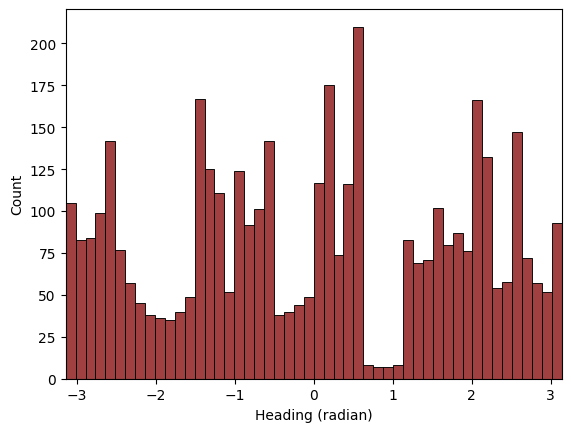

In [20]:
f = sns.histplot(angles, bins=50, color="maroon")
f.set_xlabel('Heading (radian)')
f.set_xlim(-3.14, 3.14)

In [16]:
optimal_path.shape[0] == optimal_heading.shape[0]

True

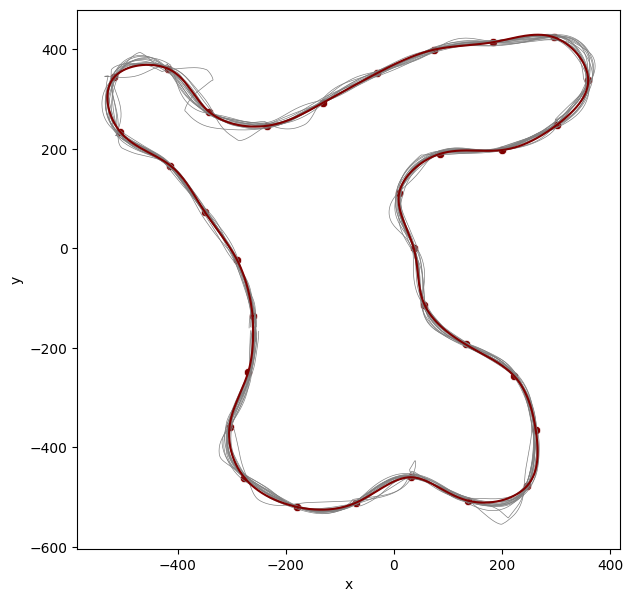

In [60]:
plot_trajectories(optimal_path, dataset, waypoints)


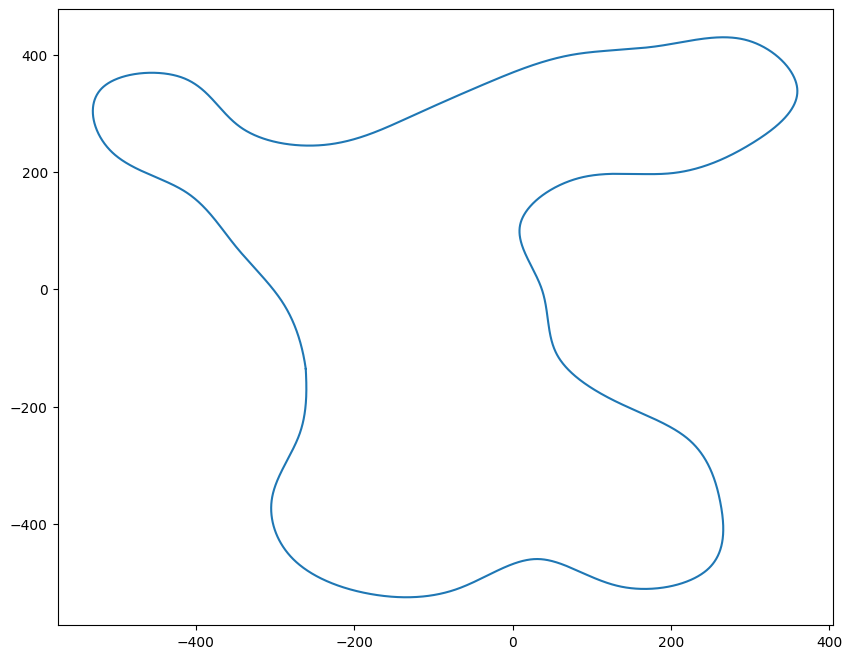

In [39]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.lineplot(x=optimal_path[:,0], y=optimal_path[:,1], sort=False)

In [42]:
sample_data = pd.read_csv('../data/subjects-xy/subject3_1.csv', delimiter=";")

In [43]:
sample_data.head(5)

,Timestamp,Lap_Number,Position.x.,Position.y.,Position.z.,Orientation.x.,Orientation.y.,Orientation.z.,Path_Deviation,Estimated_Path_Center.x.,Estimated_Path_Center.y.,Estimated_Path_Center.z.,Gaze_Location.x.,Gaze_Location.y.,Gaze_Location.z.,Subject,Gaze.x.,Gaze.y.
0,1681827797703,0,-255.4,347.2259,-182.4447,0.155342,0.0,0.0,1.8052,-253.6159,243.8401,-182.1695,-292.2738,357.403943,247.076529,3,1249.391,411.9185
1,1681827797720,0,-255.4,347.2675,-182.2537,0.223266,0.0,0.0,1.7761,-253.6447,243.8605,-181.9830,-273.2335,354.166250,168.754000,3,1261.874,410.4857
2,1681827797736,0,-255.4,347.3056,-182.0298,0.302043,0.0,0.0,1.7419,-253.6784,243.8844,-181.7643,-273.2335,354.166250,168.754000,3,1261.874,410.4857
3,1681827797753,0,-255.4,347.3404,-181.7739,0.390675,0.0,0.0,1.7029,-253.7170,243.9149,-181.5143,-273.2335,354.166250,168.754000,3,1261.874,410.4857
4,1681827797770,0,-255.4,347.3720,-181.4870,0.488227,0.0,0.0,1.6592,-253.7602,243.9506,-181.2341,-273.2335,354.166250,168.754000,3,1261.874,410.4857


In [46]:
sample_path = sample_data.iloc[:,[2, 4]].to_numpy()

In [51]:
estimated_path = sample_data.iloc[:,[11, 12]].to_numpy()

<Axes: >

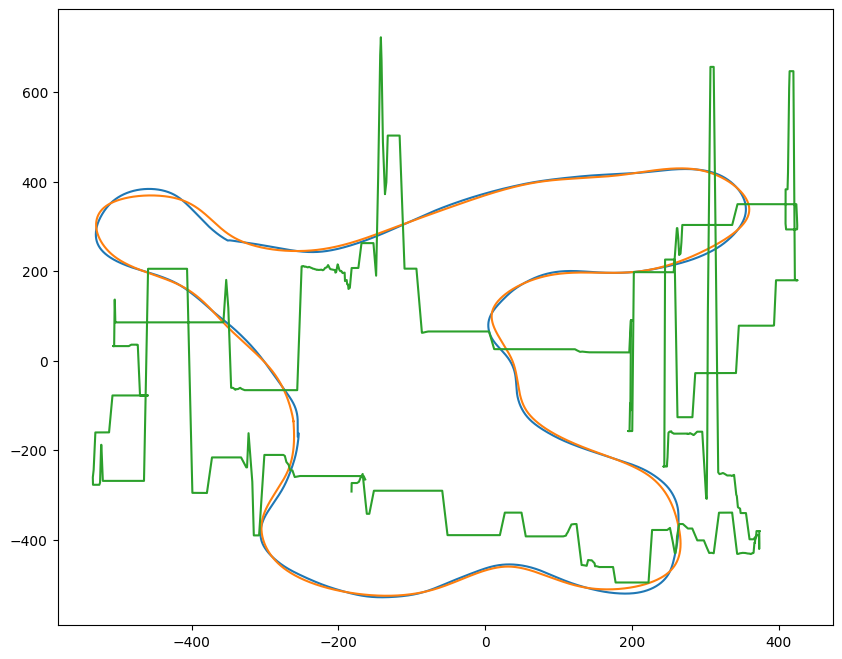

In [52]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.lineplot(x=sample_path[:,0], y=sample_path[:,1], sort=False)
sns.lineplot(x=optimal_path[:,0], y=optimal_path[:,1], sort=False)

<Axes: >

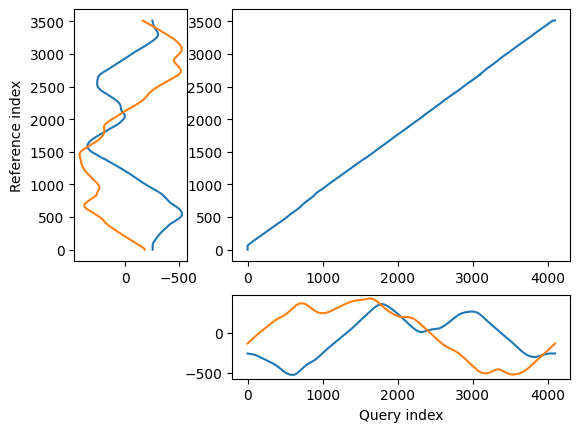

In [21]:
from dtw import *

timewarp = dtw(optimal_path, sample_path, keep_internals=True)
timewarp.plot(type="threeway")

## List of parameters and their meanings


| Symbol | Name | Description | 
| --- | --- | --- |
| $t$ | Timestamp | Timestamp for the flied trajectory |
| $\mathbf{x}$ | Position.x./y./z. | Position of the drone |
| $\theta$ | Orientation.x./y./z. | Orientation of the drone |
| $P$ | Collision\_Target | Point for the collision |
| $\Delta$ | Path\_Deviation | Deviation from the path |
| $p$ | gaze\_point\_3d\_y | Point of gaze in screen coordinates |